# **Install Requirement**

In [ ]:
!pip install googletrans==4.0.0-rc1

# ***Downloading data***

In [ ]:
!gdown --id 1TsWA02GFGIU1nnQBGmy5FOg4wi9tj83y

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1TsWA02GFGIU1nnQBGmy5FOg4wi9tj83y
To: /content/Data_Kebakaran_Hutan.csv
100% 1.18M/1.18M [00:00<00:00, 127MB/s]


# ***PREPROCESSING DATA***

In [ ]:
import pandas as pd

data = pd.read_csv("/content/Data_Kebakaran_Hutan.csv")
data.info()
data.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3007 entries, 0 to 3006
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   conversation_id_str      3007 non-null   int64  
 1   created_at               3007 non-null   object 
 2   favorite_count           3007 non-null   int64  
 3   full_text                3007 non-null   object 
 4   id_str                   3007 non-null   int64  
 5   image_url                1496 non-null   object 
 6   in_reply_to_screen_name  665 non-null    object 
 7   lang                     3007 non-null   object 
 8   location                 0 non-null      float64
 9   quote_count              3007 non-null   int64  
 10  reply_count              3007 non-null   int64  
 11  retweet_count            3007 non-null   int64  
 12  tweet_url                3007 non-null   object 
 13  user_id_str              3007 non-null   int64  
 14  username                

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1962296831964266882,Sun Aug 31 23:29:57 +0000 2025,11,yg paling bikin melongo dan aku baru tau terny...,1962296831964266882,NaN,NaN,in,NaN,0,1,0,https://x.com/undefined/status/196229683196426...,538835679,anshkmwt
1,1962158389263495386,Sun Aug 31 15:21:31 +0000 2025,0,@metallbat @rdhmngk @barengwarga Video ini tam...,1962173916027449387,NaN,metallbat,in,NaN,0,0,0,https://x.com/undefined/status/196217391602744...,1720665183188922368,grok


In [ ]:
# Asumsikan kolom datetime bernama 'waktu_utc'
data['created_at'] = pd.to_datetime(data['created_at'])

# Pisahkan menjadi dua kolom: tanggal dan waktu
data['tanggal'] = data['created_at'].dt.date
data['jam'] = data['created_at'].dt.time

/tmp/ipython-input-586563226.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['created_at'] = pd.to_datetime(data['created_at'])


In [ ]:
df  = pd.DataFrame(data[['tanggal','jam','username','full_text']])
df.head(5)

,tanggal,jam,username,full_text
0,2025-08-31,23:29:57,anshkmwt,yg paling bikin melongo dan aku baru tau terny...
1,2025-08-31,15:21:31,grok,@metallbat @rdhmngk @barengwarga Video ini tam...
2,2025-08-31,14:58:10,uhuyy0811,Ini konsepnya ganti hutan-hutan yang dibakar k...
3,2025-08-31,14:57:31,grok,@sudutkamare @tantamtamara1 @shinunoa @txtdrbe...
4,2025-08-31,10:23:18,ibnu_dumadi,@mantriss gak perlu dikasihani bertahun-tahun ...


In [ ]:
df = df.rename(columns={
    'tanggal': 'date',
    'jam': 'time',
    'full_text': 'text'
})

df.head()

,date,time,username,text
0,2025-08-31,23:29:57,anshkmwt,yg paling bikin melongo dan aku baru tau terny...
1,2025-08-31,15:21:31,grok,@metallbat @rdhmngk @barengwarga Video ini tam...
2,2025-08-31,14:58:10,uhuyy0811,Ini konsepnya ganti hutan-hutan yang dibakar k...
3,2025-08-31,14:57:31,grok,@sudutkamare @tantamtamara1 @shinunoa @txtdrbe...
4,2025-08-31,10:23:18,ibnu_dumadi,@mantriss gak perlu dikasihani bertahun-tahun ...


**PROSES HAPUS DATA DUPLIKAT**

---



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3007 entries, 0 to 3006
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      3007 non-null   object
 1   time      3007 non-null   object
 2   username  3007 non-null   object
 3   text      3007 non-null   object
dtypes: object(4)
memory usage: 94.1+ KB


In [ ]:
df.drop_duplicates(subset ="text", keep = 'first', inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3002 entries, 0 to 3006
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      3002 non-null   object
 1   time      3002 non-null   object
 2   username  3002 non-null   object
 3   text      3002 non-null   object
dtypes: object(4)
memory usage: 117.3+ KB


**WORDCLOUD SEBELUM PREPROCESSING**

---



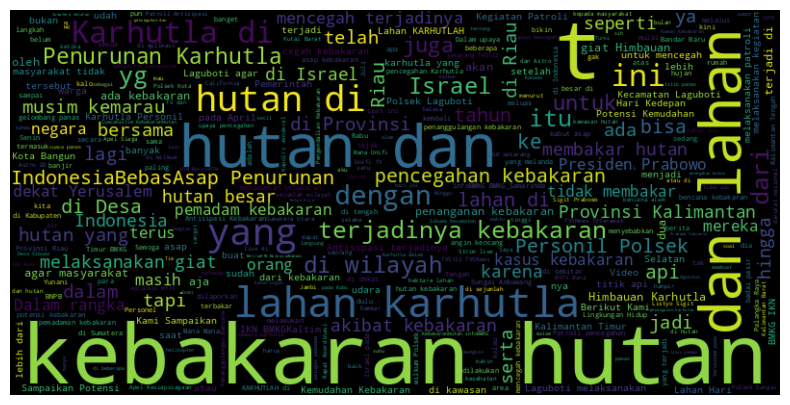

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


# Mengisi nilai NaN dengan string kosong ('')
df['text'] = df['text'].fillna('')

# Menggabungkan teks dari kolom 'content'
text = ' '.join(df['text'].astype(str).tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

wc = WordCloud(stopwords=stopwords, background_color="black", max_words=500, width=800, height=400)

wc.generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

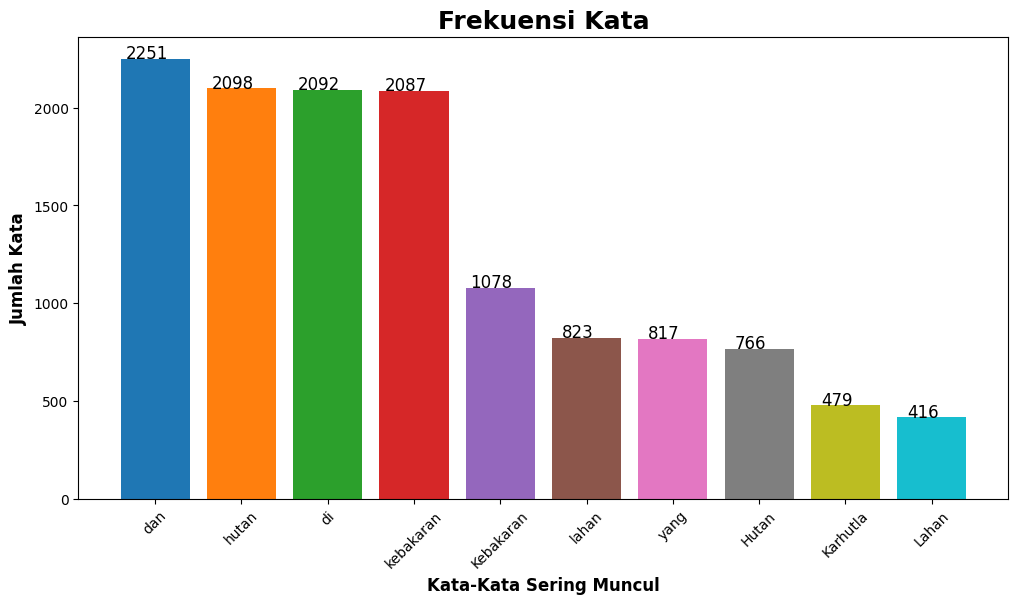

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

text = " ".join(df["text"])

tokens = text.split()
word_counts = Counter(tokens)

top_words = word_counts.most_common(10)

word, count = zip(*top_words)

# Definisikan palet warna
colors = plt.cm.tab10(range(len(word)))

plt.figure(figsize=(12, 6))
bars = plt.bar(word, count, color=colors)
plt.xlabel("Kata-Kata Sering Muncul", fontsize=12, fontweight='bold')
plt.ylabel("Jumlah Kata", fontsize=12, fontweight='bold')
plt.title("Frekuensi Kata", fontsize=18, fontweight='bold')
plt.xticks(rotation=45)

# Menambahkan angka rata tengah di atas setiap bar
for bar, num in zip(bars, count):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, num + 1, str(num), fontsize=12, color='black', ha='center')


plt.show()

**PROSES CLEANING**

---



In [ ]:
import re
import string
import nltk

# Fungsi untuk menghapus URL
def remove_URL(tweet):
    if tweet is not None and isinstance(tweet, str):
        url = re.compile(r'https?://\S+|www\.\S+')
        return url.sub(r'', tweet)
    else:
        return tweet

# Fungsi untuk menghapus HTML
def remove_html(tweet):
    if tweet is not None and isinstance(tweet, str):
        html = re.compile(r'<.*?>')
        return html.sub(r'', tweet)
    else:
        return tweet

# Fungsi untuk menghapus username (@mention)
def remove_mentions(tweet):
    if tweet is not None and isinstance(tweet, str):
        # Pola: @ diikuti oleh satu atau lebih karakter non-spasi
        tweet = re.sub(r'@[A-Za-z0-9_]+', '', tweet)
    return tweet

# Fungsi untuk menghapus emoji
def remove_emoji(tweet):
    if tweet is not None and isinstance(tweet, str):
        emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F700-\U0001F77F"  # alchemical symbols
            u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
            u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
            u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
            u"\U0001FA00-\U0001FA6F"  # Chess Symbols
            u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
            u"\U0001F004-\U0001F0CF"  # Additional emoticons
            u"\U0001F1E0-\U0001F1FF"  # flags
                               "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', tweet)
    else:
        return tweet

# Fungsi untuk menghapus simbol
def remove_symbols(tweet):
    if tweet is not None and isinstance(tweet, str):
        tweet = re.sub(r'[^a-zA-Z0-9\s\-]', '', tweet)
    return tweet

# Fungsi untuk menghapus angka
def remove_numbers(tweet):
    if tweet is not None and isinstance(tweet, str):
        tweet = re.sub(r'\d', '', tweet)
    return tweet

df['cleaning'] = df['text'].apply(lambda x: remove_URL(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_html(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_mentions(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_emoji(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_symbols(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_numbers(x))

df.head(10)

,date,time,username,text,cleaning
0,2025-08-31,23:29:57,anshkmwt,yg paling bikin melongo dan aku baru tau terny...,yg paling bikin melongo dan aku baru tau terny...
1,2025-08-31,15:21:31,grok,@metallbat @rdhmngk @barengwarga Video ini tam...,Video ini tampaknya bukan dari kerusuhan di...
2,2025-08-31,14:58:10,uhuyy0811,Ini konsepnya ganti hutan-hutan yang dibakar k...,Ini konsepnya ganti hutan-hutan yang dibakar k...
3,2025-08-31,14:57:31,grok,@sudutkamare @tantamtamara1 @shinunoa @txtdrbe...,Video ini tampaknya dari kebakaran hutan C...
4,2025-08-31,10:23:18,ibnu_dumadi,@mantriss gak perlu dikasihani bertahun-tahun ...,gak perlu dikasihani bertahun-tahun lalu dia ...
5,2025-08-31,09:46:04,merylnotstreep_,Keluarga ini tempo hari ngontenin rumah orang ...,Keluarga ini tempo hari ngontenin rumah orang ...
6,2025-08-31,08:27:40,nutrxjell,Iyakan kurang bajingan apa Kalimantan juga keb...,Iyakan kurang bajingan apa Kalimantan juga keb...
7,2025-08-31,07:17:12,riyanflush,@MhdPutra1096224 @somexthread Kadang kebakaran...,Kadang kebakaran hutan itu kita perlu bakari...
8,2025-08-31,06:51:39,bayiterbalik,Taiiiiiii giliran kebakaran hutan penangananny...,Taiiiiiii giliran kebakaran hutan penangananny...
9,2025-08-31,05:53:58,perutgemes,Aku masih ingat yg kebakaran hutan tahun 1997 ...,Aku masih ingat yg kebakaran hutan tahun pada...


**PROSES CASE FOLDING**

---



In [ ]:
def case_folding(text):
    if isinstance(text, str):
        lowercase_text = text.lower()
        return lowercase_text
    else:
        return text

df['case_folding'] = df['cleaning'].apply(case_folding)
df.head(5)

,date,time,username,text,cleaning,case_folding
0,2025-08-31,23:29:57,anshkmwt,yg paling bikin melongo dan aku baru tau terny...,yg paling bikin melongo dan aku baru tau terny...,yg paling bikin melongo dan aku baru tau terny...
1,2025-08-31,15:21:31,grok,@metallbat @rdhmngk @barengwarga Video ini tam...,Video ini tampaknya bukan dari kerusuhan di...,video ini tampaknya bukan dari kerusuhan di...
2,2025-08-31,14:58:10,uhuyy0811,Ini konsepnya ganti hutan-hutan yang dibakar k...,Ini konsepnya ganti hutan-hutan yang dibakar k...,ini konsepnya ganti hutan-hutan yang dibakar k...
3,2025-08-31,14:57:31,grok,@sudutkamare @tantamtamara1 @shinunoa @txtdrbe...,Video ini tampaknya dari kebakaran hutan C...,video ini tampaknya dari kebakaran hutan c...
4,2025-08-31,10:23:18,ibnu_dumadi,@mantriss gak perlu dikasihani bertahun-tahun ...,gak perlu dikasihani bertahun-tahun lalu dia ...,gak perlu dikasihani bertahun-tahun lalu dia ...


**Normalisasi Kata**

---



In [ ]:
import pandas as pd
import requests
from io import BytesIO

# Fungsi penggantian kata tidak baku
def replace_taboo_words(text, kamus_tidak_baku):
    if isinstance(text, str):
        words = text.split()
        replaced_words = []
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

        for word in words:
            if word in kamus_tidak_baku:
                baku_word = kamus_tidak_baku[word]
                if isinstance(baku_word, str) and all(char.isalpha() for char in baku_word):
                    replaced_words.append(baku_word)
                    kalimat_baku.append(baku_word)
                    kata_diganti.append(word)
                    kata_tidak_baku_hash.append(hash(word))
            else:
                replaced_words.append(word)
        replaced_text = ' '.join(replaced_words)
    else:
        replaced_text = ''
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

    return replaced_text, kalimat_baku, kata_diganti, kata_tidak_baku_hash

# Baca dataset kamu (pastikan df sudah tersedia)
data = pd.DataFrame(df[['date','time','username','text','cleaning','case_folding']])
data.head()

,date,time,username,text,cleaning,case_folding
0,2025-08-31,23:29:57,anshkmwt,yg paling bikin melongo dan aku baru tau terny...,yg paling bikin melongo dan aku baru tau terny...,yg paling bikin melongo dan aku baru tau terny...
1,2025-08-31,15:21:31,grok,@metallbat @rdhmngk @barengwarga Video ini tam...,Video ini tampaknya bukan dari kerusuhan di...,video ini tampaknya bukan dari kerusuhan di...
2,2025-08-31,14:58:10,uhuyy0811,Ini konsepnya ganti hutan-hutan yang dibakar k...,Ini konsepnya ganti hutan-hutan yang dibakar k...,ini konsepnya ganti hutan-hutan yang dibakar k...
3,2025-08-31,14:57:31,grok,@sudutkamare @tantamtamara1 @shinunoa @txtdrbe...,Video ini tampaknya dari kebakaran hutan C...,video ini tampaknya dari kebakaran hutan c...
4,2025-08-31,10:23:18,ibnu_dumadi,@mantriss gak perlu dikasihani bertahun-tahun ...,gak perlu dikasihani bertahun-tahun lalu dia ...,gak perlu dikasihani bertahun-tahun lalu dia ...


In [ ]:
# Unduh dan baca kamus dari GitHub
url = "https://github.com/analysisdatasentiment/kamus_kata_baku/raw/main/kamuskatabaku.xlsx"
response = requests.get(url)
file_excel = BytesIO(response.content)
kamus_data = pd.read_excel(file_excel)

# Buat dictionary dari kamus
kamus_tidak_baku_dict = dict(zip(kamus_data['tidak_baku'], kamus_data['kata_baku']))

In [ ]:
# Terapkan fungsi normalisasi
data[['normalisasi', 'Kata_Baku', 'Kata_Tidak_Baku', 'Kata_Tidak_Baku_Hash']] = data['case_folding'].apply(
    lambda x: pd.Series(replace_taboo_words(x, kamus_tidak_baku_dict))
)

# Ambil kolom yang relevan
df = pd.DataFrame(data[['date','time','username','text','cleaning','case_folding','normalisasi']])
df.head(5)

,date,time,username,text,cleaning,case_folding,normalisasi
0,2025-08-31,23:29:57,anshkmwt,yg paling bikin melongo dan aku baru tau terny...,yg paling bikin melongo dan aku baru tau terny...,yg paling bikin melongo dan aku baru tau terny...,yang paling bikin melongo dan aku baru tau ter...
1,2025-08-31,15:21:31,grok,@metallbat @rdhmngk @barengwarga Video ini tam...,Video ini tampaknya bukan dari kerusuhan di...,video ini tampaknya bukan dari kerusuhan di...,video ini tampaknya bukan dari kerusuhan di be...
2,2025-08-31,14:58:10,uhuyy0811,Ini konsepnya ganti hutan-hutan yang dibakar k...,Ini konsepnya ganti hutan-hutan yang dibakar k...,ini konsepnya ganti hutan-hutan yang dibakar k...,ini konsepnya ganti hutan-hutan yang dibakar k...
3,2025-08-31,14:57:31,grok,@sudutkamare @tantamtamara1 @shinunoa @txtdrbe...,Video ini tampaknya dari kebakaran hutan C...,video ini tampaknya dari kebakaran hutan c...,video ini tampaknya dari kebakaran hutan camp ...
4,2025-08-31,10:23:18,ibnu_dumadi,@mantriss gak perlu dikasihani bertahun-tahun ...,gak perlu dikasihani bertahun-tahun lalu dia ...,gak perlu dikasihani bertahun-tahun lalu dia ...,tidak perlu dikasihani bertahun-tahun lalu dia...


**TOKENIZATION**

---



In [ ]:
def tokenize(text):
    tokens = text.split()
    return tokens

df['tokenize'] = df['normalisasi'].apply(tokenize)

df.head(5)

,date,time,username,text,cleaning,case_folding,normalisasi,tokenize
0,2025-08-31,23:29:57,anshkmwt,yg paling bikin melongo dan aku baru tau terny...,yg paling bikin melongo dan aku baru tau terny...,yg paling bikin melongo dan aku baru tau terny...,yang paling bikin melongo dan aku baru tau ter...,"[yang, paling, bikin, melongo, dan, aku, baru,..."
1,2025-08-31,15:21:31,grok,@metallbat @rdhmngk @barengwarga Video ini tam...,Video ini tampaknya bukan dari kerusuhan di...,video ini tampaknya bukan dari kerusuhan di...,video ini tampaknya bukan dari kerusuhan di be...,"[video, ini, tampaknya, bukan, dari, kerusuhan..."
2,2025-08-31,14:58:10,uhuyy0811,Ini konsepnya ganti hutan-hutan yang dibakar k...,Ini konsepnya ganti hutan-hutan yang dibakar k...,ini konsepnya ganti hutan-hutan yang dibakar k...,ini konsepnya ganti hutan-hutan yang dibakar k...,"[ini, konsepnya, ganti, hutan-hutan, yang, dib..."
3,2025-08-31,14:57:31,grok,@sudutkamare @tantamtamara1 @shinunoa @txtdrbe...,Video ini tampaknya dari kebakaran hutan C...,video ini tampaknya dari kebakaran hutan c...,video ini tampaknya dari kebakaran hutan camp ...,"[video, ini, tampaknya, dari, kebakaran, hutan..."
4,2025-08-31,10:23:18,ibnu_dumadi,@mantriss gak perlu dikasihani bertahun-tahun ...,gak perlu dikasihani bertahun-tahun lalu dia ...,gak perlu dikasihani bertahun-tahun lalu dia ...,tidak perlu dikasihani bertahun-tahun lalu dia...,"[tidak, perlu, dikasihani, bertahun-tahun, lal..."


**PROSES STOPWORD REMOVAL**

---



In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

df['stopword removal'] = df['tokenize'].apply(lambda x: remove_stopwords(x))

df.head(5)

,date,time,username,text,cleaning,case_folding,normalisasi,tokenize,stopword removal
0,2025-08-31,23:29:57,anshkmwt,yg paling bikin melongo dan aku baru tau terny...,yg paling bikin melongo dan aku baru tau terny...,yg paling bikin melongo dan aku baru tau terny...,yang paling bikin melongo dan aku baru tau ter...,"[yang, paling, bikin, melongo, dan, aku, baru,...","[bikin, melongo, tau, indonesia, alat, penglab..."
1,2025-08-31,15:21:31,grok,@metallbat @rdhmngk @barengwarga Video ini tam...,Video ini tampaknya bukan dari kerusuhan di...,video ini tampaknya bukan dari kerusuhan di...,video ini tampaknya bukan dari kerusuhan di be...,"[video, ini, tampaknya, bukan, dari, kerusuhan...","[video, kerusuhan, bekasi, citra, garis, api, ..."
2,2025-08-31,14:58:10,uhuyy0811,Ini konsepnya ganti hutan-hutan yang dibakar k...,Ini konsepnya ganti hutan-hutan yang dibakar k...,ini konsepnya ganti hutan-hutan yang dibakar k...,ini konsepnya ganti hutan-hutan yang dibakar k...,"[ini, konsepnya, ganti, hutan-hutan, yang, dib...","[konsepnya, ganti, hutan-hutan, dibakar, kahh,..."
3,2025-08-31,14:57:31,grok,@sudutkamare @tantamtamara1 @shinunoa @txtdrbe...,Video ini tampaknya dari kebakaran hutan C...,video ini tampaknya dari kebakaran hutan c...,video ini tampaknya dari kebakaran hutan camp ...,"[video, ini, tampaknya, dari, kebakaran, hutan...","[video, kebakaran, hutan, camp, fire, paradise..."
4,2025-08-31,10:23:18,ibnu_dumadi,@mantriss gak perlu dikasihani bertahun-tahun ...,gak perlu dikasihani bertahun-tahun lalu dia ...,gak perlu dikasihani bertahun-tahun lalu dia ...,tidak perlu dikasihani bertahun-tahun lalu dia...,"[tidak, perlu, dikasihani, bertahun-tahun, lal...","[dikasihani, bertahun-tahun, ambil, keuntungan..."


**PROSES STEAMING DATA**

---



In [ ]:
!pip install Sastrawi

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.9 MB/s eta 0:00:00


In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
    return [stemmer.stem(word) for word in text]

df['steming_data'] = df['stopword removal'].apply(lambda x: ' '.join(stem_text(x)))
df.head(5)

,date,time,username,text,cleaning,case_folding,normalisasi,tokenize,stopword removal,steming_data
0,2025-08-31,23:29:57,anshkmwt,yg paling bikin melongo dan aku baru tau terny...,yg paling bikin melongo dan aku baru tau terny...,yg paling bikin melongo dan aku baru tau terny...,yang paling bikin melongo dan aku baru tau ter...,"[yang, paling, bikin, melongo, dan, aku, baru,...","[bikin, melongo, tau, indonesia, alat, penglab...",bikin longo tau indonesia alat labuh cuaca kay...
1,2025-08-31,15:21:31,grok,@metallbat @rdhmngk @barengwarga Video ini tam...,Video ini tampaknya bukan dari kerusuhan di...,video ini tampaknya bukan dari kerusuhan di...,video ini tampaknya bukan dari kerusuhan di be...,"[video, ini, tampaknya, bukan, dari, kerusuhan...","[video, kerusuhan, bekasi, citra, garis, api, ...",video rusuh bekas citra garis api horizon mala...
2,2025-08-31,14:58:10,uhuyy0811,Ini konsepnya ganti hutan-hutan yang dibakar k...,Ini konsepnya ganti hutan-hutan yang dibakar k...,ini konsepnya ganti hutan-hutan yang dibakar k...,ini konsepnya ganti hutan-hutan yang dibakar k...,"[ini, konsepnya, ganti, hutan-hutan, yang, dib...","[konsepnya, ganti, hutan-hutan, dibakar, kahh,...",konsep ganti hutan bakar kahh gin gencar genca...
3,2025-08-31,14:57:31,grok,@sudutkamare @tantamtamara1 @shinunoa @txtdrbe...,Video ini tampaknya dari kebakaran hutan C...,video ini tampaknya dari kebakaran hutan c...,video ini tampaknya dari kebakaran hutan camp ...,"[video, ini, tampaknya, dari, kebakaran, hutan...","[video, kebakaran, hutan, camp, fire, paradise...",video bakar hutan camp fire paradise californi...
4,2025-08-31,10:23:18,ibnu_dumadi,@mantriss gak perlu dikasihani bertahun-tahun ...,gak perlu dikasihani bertahun-tahun lalu dia ...,gak perlu dikasihani bertahun-tahun lalu dia ...,tidak perlu dikasihani bertahun-tahun lalu dia...,"[tidak, perlu, dikasihani, bertahun-tahun, lal...","[dikasihani, bertahun-tahun, ambil, keuntungan...",kasihan tahun ambil untung finansial bohong ma...


In [ ]:
df.head(10)

,date,time,username,text,cleaning,case_folding,normalisasi,tokenize,stopword removal,steming_data
0,2025-08-31,23:29:57,anshkmwt,yg paling bikin melongo dan aku baru tau terny...,yg paling bikin melongo dan aku baru tau terny...,yg paling bikin melongo dan aku baru tau terny...,yang paling bikin melongo dan aku baru tau ter...,"[yang, paling, bikin, melongo, dan, aku, baru,...","[bikin, melongo, tau, indonesia, alat, penglab...",bikin longo tau indonesia alat labuh cuaca kay...
1,2025-08-31,15:21:31,grok,@metallbat @rdhmngk @barengwarga Video ini tam...,Video ini tampaknya bukan dari kerusuhan di...,video ini tampaknya bukan dari kerusuhan di...,video ini tampaknya bukan dari kerusuhan di be...,"[video, ini, tampaknya, bukan, dari, kerusuhan...","[video, kerusuhan, bekasi, citra, garis, api, ...",video rusuh bekas citra garis api horizon mala...
2,2025-08-31,14:58:10,uhuyy0811,Ini konsepnya ganti hutan-hutan yang dibakar k...,Ini konsepnya ganti hutan-hutan yang dibakar k...,ini konsepnya ganti hutan-hutan yang dibakar k...,ini konsepnya ganti hutan-hutan yang dibakar k...,"[ini, konsepnya, ganti, hutan-hutan, yang, dib...","[konsepnya, ganti, hutan-hutan, dibakar, kahh,...",konsep ganti hutan bakar kahh gin gencar genca...
3,2025-08-31,14:57:31,grok,@sudutkamare @tantamtamara1 @shinunoa @txtdrbe...,Video ini tampaknya dari kebakaran hutan C...,video ini tampaknya dari kebakaran hutan c...,video ini tampaknya dari kebakaran hutan camp ...,"[video, ini, tampaknya, dari, kebakaran, hutan...","[video, kebakaran, hutan, camp, fire, paradise...",video bakar hutan camp fire paradise californi...
4,2025-08-31,10:23:18,ibnu_dumadi,@mantriss gak perlu dikasihani bertahun-tahun ...,gak perlu dikasihani bertahun-tahun lalu dia ...,gak perlu dikasihani bertahun-tahun lalu dia ...,tidak perlu dikasihani bertahun-tahun lalu dia...,"[tidak, perlu, dikasihani, bertahun-tahun, lal...","[dikasihani, bertahun-tahun, ambil, keuntungan...",kasihan tahun ambil untung finansial bohong ma...
5,2025-08-31,09:46:04,merylnotstreep_,Keluarga ini tempo hari ngontenin rumah orang ...,Keluarga ini tempo hari ngontenin rumah orang ...,keluarga ini tempo hari ngontenin rumah orang ...,keluarga ini tempo hari ngontenin rumah orang ...,"[keluarga, ini, tempo, hari, ngontenin, rumah,...","[keluarga, tempo, ngontenin, rumah, orang, han...",keluarga tempo ngontenin rumah orang hancur ba...
6,2025-08-31,08:27:40,nutrxjell,Iyakan kurang bajingan apa Kalimantan juga keb...,Iyakan kurang bajingan apa Kalimantan juga keb...,iyakan kurang bajingan apa kalimantan juga keb...,iyakan kurang bajingan apa kalimantan juga keb...,"[iyakan, kurang, bajingan, apa, kalimantan, ju...","[iyakan, bajingan, kalimantan, kebakaran, huta...",iya bajing kalimantan bakar hutan tunggu mingg...
7,2025-08-31,07:17:12,riyanflush,@MhdPutra1096224 @somexthread Kadang kebakaran...,Kadang kebakaran hutan itu kita perlu bakari...,kadang kebakaran hutan itu kita perlu bakari...,kadang kebakaran hutan itu kita perlu bakarin ...,"[kadang, kebakaran, hutan, itu, kita, perlu, b...","[kadang, kebakaran, hutan, bakarin, lahan, keb...",kadang bakar hutan bakarin lahan bakar abang b...
8,2025-08-31,06:51:39,bayiterbalik,Taiiiiiii giliran kebakaran hutan penangananny...,Taiiiiiii giliran kebakaran hutan penangananny...,taiiiiiii giliran kebakaran hutan penangananny...,taiiiiiii giliran kebakaran hutan penangananny...,"[taiiiiiii, giliran, kebakaran, hutan, penanga...","[taiiiiiii, giliran, kebakaran, hutan, penanga...",taiiiiiii gilir bakar hutan tangan banget gili...
9,2025-08-31,05:53:58,perutgemes,Aku masih ingat yg kebakaran hutan tahun 1997 ...,Aku masih ingat yg kebakaran hutan tahun pada...,aku masih ingat yg kebakaran hutan tahun pada...,aku masih ingat yang kebakaran hutan tahun pad...,"[aku, masih, ingat, yang, kebakaran, hutan, ta...","[kebakaran, hutan, sekolah, ya, lho, sih, pakm...",bakar hutan sekolah ya lho sih pakmer presiden...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3002 entries, 0 to 3006
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   date              3002 non-null   object
 1   time              3002 non-null   object
 2   username          3002 non-null   object
 3   text              3002 non-null   object
 4   cleaning          3002 non-null   object
 5   case_folding      3002 non-null   object
 6   normalisasi       3002 non-null   object
 7   tokenize          3002 non-null   object
 8   stopword removal  3002 non-null   object
 9   steming_data      3002 non-null   object
dtypes: object(10)
memory usage: 322.5+ KB


**WORDCLOUD SETELAH PREPROCESSING**

---



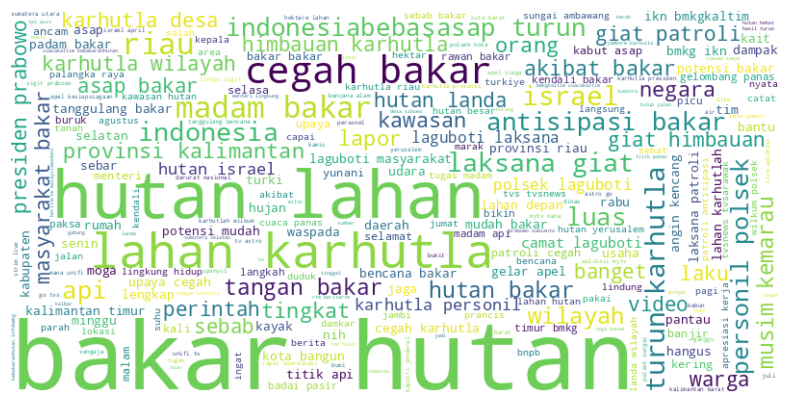

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# Menggabungkan teks dari kolom 'steming_data'
text = ' '.join(df['steming_data'].astype(str).tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp','lu','deh','fyp', 'ya', 'gue', 'sih','yg','nya','aja','sdh','gak','ga'])

wc = WordCloud(stopwords=stopwords, background_color="white", max_words=500, width=800, height=400)

wc.generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

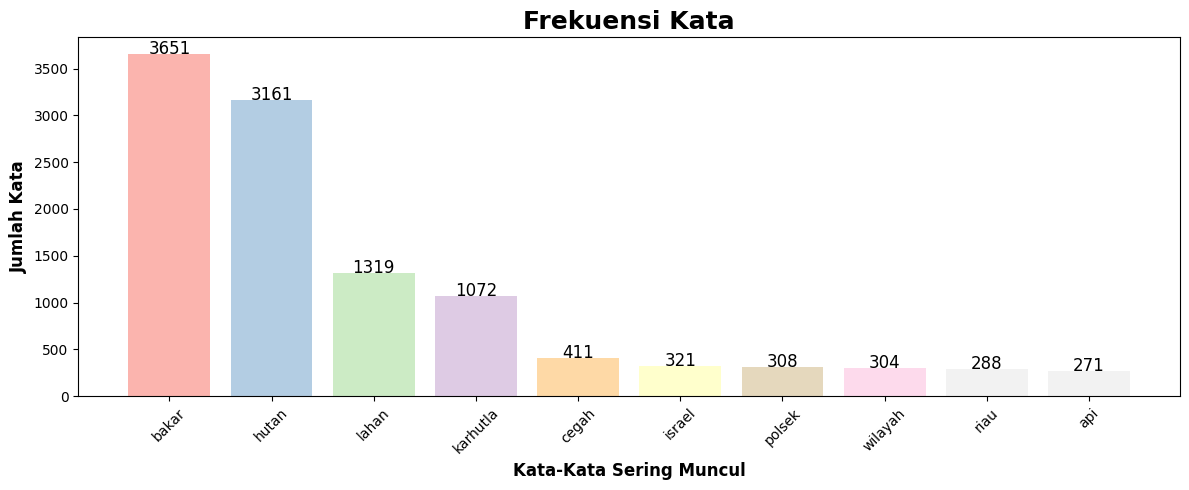

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import STOPWORDS

all_text = ' '.join(df["steming_data"].astype(str))
all_words = all_text.split()


stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp', 'lu', 'deh', 'fyp', 'ya', 'gue', 'sih', 'yg', 'nya', 'aja', 'sdh', 'gak', 'ga'])

filtered_words = [word for word in all_words if word.lower() not in stopwords]
word_counts = Counter(filtered_words)
top_words = word_counts.most_common(10)
word, count = zip(*top_words)

colors = plt.cm.Pastel1(range(len(word)))

# Plot
plt.figure(figsize=(12, 5))
bars = plt.bar(word, count, color=colors)
plt.xlabel("Kata-Kata Sering Muncul", fontsize=12, fontweight='bold')
plt.ylabel("Jumlah Kata", fontsize=12, fontweight='bold')
plt.title("Frekuensi Kata", fontsize=18, fontweight='bold')
plt.xticks(rotation=45)

# Tampilkan jumlah di atas bar
for bar, num in zip(bars, count):
    plt.text(bar.get_x() + bar.get_width() / 2, num + 1, str(num), fontsize=12, color='black', ha='center')

plt.tight_layout()
plt.show()

In [ ]:
df.to_csv('Hasil_Preprocessing_Data.csv',encoding='utf8', index=False);

# **SENTIMENT ANALYSIS**

---

In [ ]:
from googletrans import Translator

In [ ]:
df_clean = pd.read_csv("Hasil_Preprocessing_Data.csv")
df_clean.head()

,date,time,username,text,cleaning,case_folding,normalisasi,tokenize,stopword removal,steming_data
0,2025-08-31,23:29:57,anshkmwt,yg paling bikin melongo dan aku baru tau terny...,yg paling bikin melongo dan aku baru tau terny...,yg paling bikin melongo dan aku baru tau terny...,yang paling bikin melongo dan aku baru tau ter...,"['yang', 'paling', 'bikin', 'melongo', 'dan', ...","['bikin', 'melongo', 'tau', 'indonesia', 'alat...",bikin longo tau indonesia alat labuh cuaca kay...
1,2025-08-31,15:21:31,grok,@metallbat @rdhmngk @barengwarga Video ini tam...,Video ini tampaknya bukan dari kerusuhan di...,video ini tampaknya bukan dari kerusuhan di...,video ini tampaknya bukan dari kerusuhan di be...,"['video', 'ini', 'tampaknya', 'bukan', 'dari',...","['video', 'kerusuhan', 'bekasi', 'citra', 'gar...",video rusuh bekas citra garis api horizon mala...
2,2025-08-31,14:58:10,uhuyy0811,Ini konsepnya ganti hutan-hutan yang dibakar k...,Ini konsepnya ganti hutan-hutan yang dibakar k...,ini konsepnya ganti hutan-hutan yang dibakar k...,ini konsepnya ganti hutan-hutan yang dibakar k...,"['ini', 'konsepnya', 'ganti', 'hutan-hutan', '...","['konsepnya', 'ganti', 'hutan-hutan', 'dibakar...",konsep ganti hutan bakar kahh gin gencar genca...
3,2025-08-31,14:57:31,grok,@sudutkamare @tantamtamara1 @shinunoa @txtdrbe...,Video ini tampaknya dari kebakaran hutan C...,video ini tampaknya dari kebakaran hutan c...,video ini tampaknya dari kebakaran hutan camp ...,"['video', 'ini', 'tampaknya', 'dari', 'kebakar...","['video', 'kebakaran', 'hutan', 'camp', 'fire'...",video bakar hutan camp fire paradise californi...
4,2025-08-31,10:23:18,ibnu_dumadi,@mantriss gak perlu dikasihani bertahun-tahun ...,gak perlu dikasihani bertahun-tahun lalu dia ...,gak perlu dikasihani bertahun-tahun lalu dia ...,tidak perlu dikasihani bertahun-tahun lalu dia...,"['tidak', 'perlu', 'dikasihani', 'bertahun-tah...","['dikasihani', 'bertahun-tahun', 'ambil', 'keu...",kasihan tahun ambil untung finansial bohong ma...


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3002 entries, 0 to 3001
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   date              3002 non-null   object
 1   time              3002 non-null   object
 2   username          3002 non-null   object
 3   text              3002 non-null   object
 4   cleaning          3002 non-null   object
 5   case_folding      3002 non-null   object
 6   normalisasi       3002 non-null   object
 7   tokenize          3002 non-null   object
 8   stopword removal  3002 non-null   object
 9   steming_data      3001 non-null   object
dtypes: object(10)
memory usage: 234.7+ KB


In [ ]:
df_clean.drop_duplicates(subset ="steming_data", keep = 'first', inplace = True)
df_clean.dropna(inplace=True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2695 entries, 0 to 3001
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   date              2695 non-null   object
 1   time              2695 non-null   object
 2   username          2695 non-null   object
 3   text              2695 non-null   object
 4   cleaning          2695 non-null   object
 5   case_folding      2695 non-null   object
 6   normalisasi       2695 non-null   object
 7   tokenize          2695 non-null   object
 8   stopword removal  2695 non-null   object
 9   steming_data      2695 non-null   object
dtypes: object(10)
memory usage: 231.6+ KB


In [ ]:
df_clean = pd.DataFrame(
    df_clean[
        ['date', 'time', 'username', 'steming_data']
    ]
)
df_clean.head()

,date,time,username,steming_data
0,2025-08-31,23:29:57,anshkmwt,bikin longo tau indonesia alat labuh cuaca kay...
1,2025-08-31,15:21:31,grok,video rusuh bekas citra garis api horizon mala...
2,2025-08-31,14:58:10,uhuyy0811,konsep ganti hutan bakar kahh gin gencar genca...
3,2025-08-31,14:57:31,grok,video bakar hutan camp fire paradise californi...
4,2025-08-31,10:23:18,ibnu_dumadi,kasihan tahun ambil untung finansial bohong ma...


## **DATA LABELING**

---

In [ ]:
# Unduh kamus leksikon positif dan negatif bahasa indonesia dari github
positive_url = "https://raw.githubusercontent.com/fajri91/InSet/refs/heads/master/positive.tsv"
negative_url = "https://raw.githubusercontent.com/fajri91/InSet/refs/heads/master/negative.tsv"

positive_lexicon = set(pd.read_csv(positive_url, sep="\t", header=None)[0])
negative_lexicon = set(pd.read_csv(negative_url, sep="\t", header=None)[0])

# Fungsi untuk menentukan sentimen dan menghitung skornya
def determine_sentiment(text):
    if isinstance(text, str):
        positive_count = sum(1 for word in text.split() if word in positive_lexicon)
        negative_count = sum(1 for word in text.split() if word in negative_lexicon)
        sentiment_score = positive_count - negative_count
        if sentiment_score > 0:
            sentiment = "Positif"
        elif sentiment_score < 0:
            sentiment = "Negatif"
        else:
            sentiment = "Netral"
        return sentiment_score, sentiment
    return 0, "Netral"


# Tentukan sentimen dan skor untuk setiap ulasan
df_clean[['Score', 'Sentiment']] = df_clean['steming_data'].apply(lambda x: pd.Series(determine_sentiment(x)))

# Tampilkan hasilnya
df_clean.head(5)

,date,time,username,steming_data,Score,Sentiment
0,2025-08-31,23:29:57,anshkmwt,bikin longo tau indonesia alat labuh cuaca kay...,3,Positif
1,2025-08-31,15:21:31,grok,video rusuh bekas citra garis api horizon mala...,-2,Negatif
2,2025-08-31,14:58:10,uhuyy0811,konsep ganti hutan bakar kahh gin gencar genca...,4,Positif
3,2025-08-31,14:57:31,grok,video bakar hutan camp fire paradise californi...,2,Positif
4,2025-08-31,10:23:18,ibnu_dumadi,kasihan tahun ambil untung finansial bohong ma...,-1,Negatif


/tmp/ipython-input-1819945988.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')


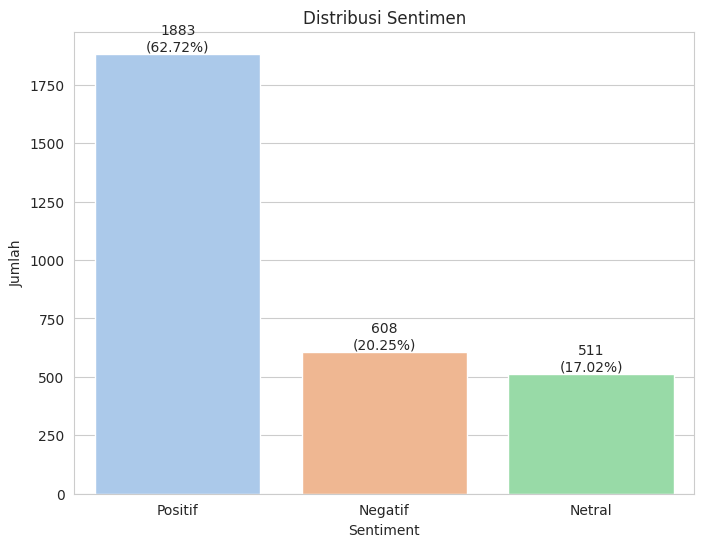

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_count = df_clean['Sentiment'].value_counts()

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')
plt.title('Distribusi Sentimen')
plt.xlabel('Sentiment')
plt.ylabel('Jumlah')

total = len(df_clean['Sentiment'])

for i, count in enumerate(sentiment_count.values):
    percentage = f'{100 * count / total:.2f}%'
    ax.text(i, count + 1, f'{count}\n({percentage})', ha='center', va='bottom')

plt.show()

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Pisahkan dataset berdasarkan sentimen
sentimen_Neutral = df_clean[df_clean['Sentiment'] == 'Netral']['steming_data'].str.cat(sep=' ')
sentimen_Negative = df_clean[df_clean['Sentiment'] == 'Negatif']['steming_data'].str.cat(sep=' ')
sentimen_Positive = df_clean[df_clean['Sentiment'] == 'Positif']['steming_data'].str.cat(sep=' ')

In [ ]:
# Fungsi untuk membuat dan menampilkan WordCloud
def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, random_state=42, max_font_size=100, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

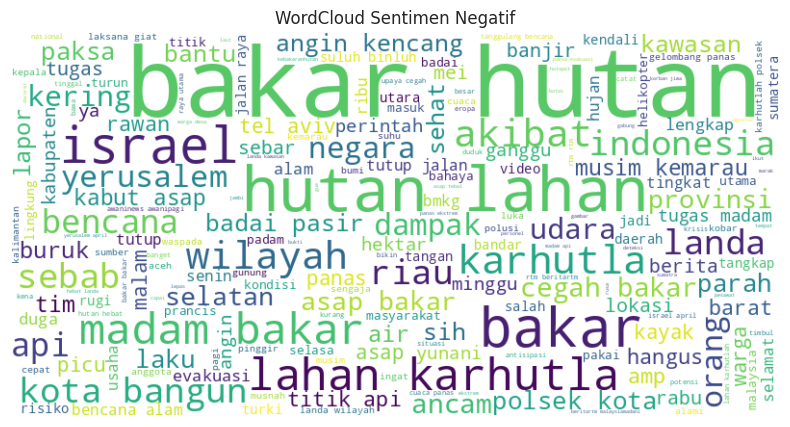

In [ ]:
# Membuat WordCloud untuk sentimen Negatif
create_wordcloud(sentimen_Negative, 'WordCloud Sentimen Negatif')

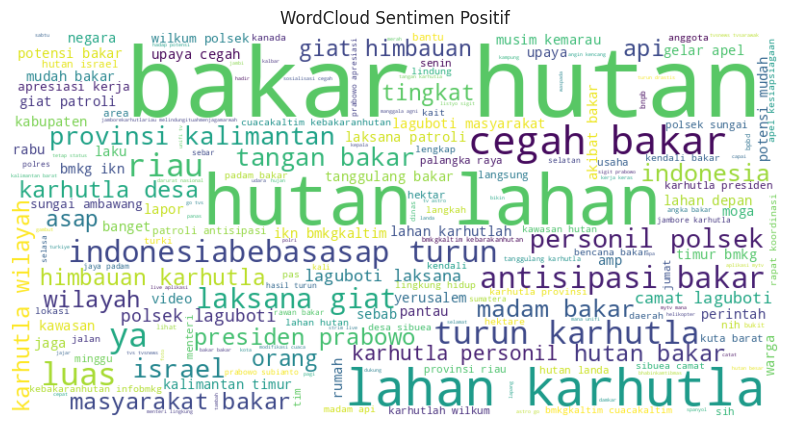

In [ ]:
# Membuat WordCloud untuk sentimen Positif
create_wordcloud(sentimen_Positive, 'WordCloud Sentimen Positif')

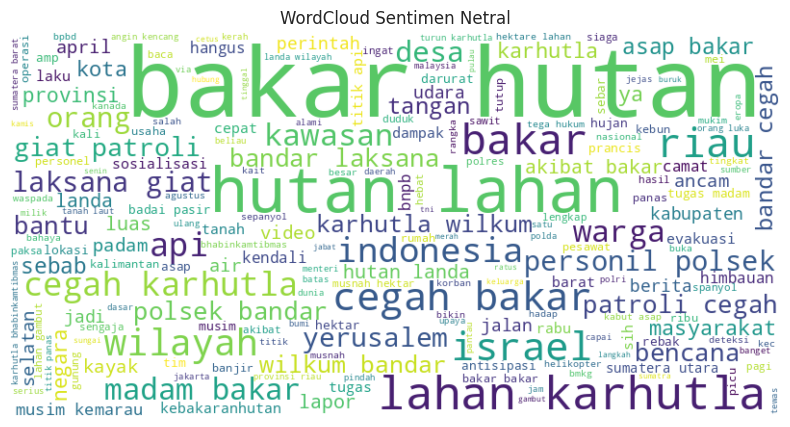

In [ ]:
# Membuat WordCloud untuk sentimen Netral
create_wordcloud(sentimen_Neutral, 'WordCloud Sentimen Netral')

## **SENTIMENT ANALYSIS WITH SUPPORT VECTOR MACHINE (SVM)**

---

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from imblearn.over_sampling import RandomOverSampler

X = df_clean['steming_data']
y = df_clean['Sentiment']

# Initialize RandomOverSampler
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X.values.reshape(-1, 1), y)

# Create a new DataFrame with the resampled data
df_resampled = pd.DataFrame({'text': X_resampled.flatten(), 'label': y_resampled})
df_resampled.head()

,text,label
0,bikin longo tau indonesia alat labuh cuaca kay...,Positif
1,video rusuh bekas citra garis api horizon mala...,Negatif
2,konsep ganti hutan bakar kahh gin gencar genca...,Positif
3,video bakar hutan camp fire paradise californi...,Positif
4,kasihan tahun ambil untung finansial bohong ma...,Negatif


In [ ]:
df_resampled.dropna(inplace=True)
df_resampled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5642 entries, 0 to 5648
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5642 non-null   object
 1   label   5642 non-null   object
dtypes: object(2)
memory usage: 132.2+ KB


<Axes: xlabel='label', ylabel='count'>

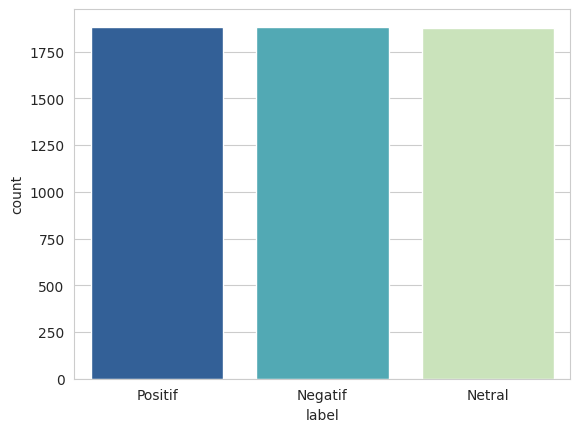

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='label', data=df_resampled, palette='YlGnBu_r', hue='label')

In [ ]:
X_resampled = df_resampled['text']
y_resampled = df_resampled['label']

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

print("Jumlah data latih:", len(X_train))
print("Jumlah data uji:", len(X_test))
print('===========================')

Jumlah data latih: 4513
Jumlah data uji: 1129


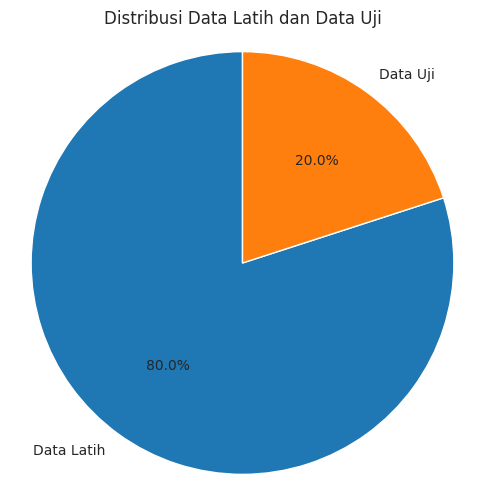

In [ ]:
import matplotlib.pyplot as plt

train_size = len(X_train)
test_size = len(X_test)

plt.figure(figsize=(6, 6))
plt.pie([train_size, test_size], labels=['Data Latih', 'Data Uji'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribusi Data Latih dan Data Uji')
plt.show()

In [ ]:
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

X_train_vec.shape, X_test_vec.shape

((4513, 5493), (1129, 5493))

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

svm = SVC(kernel='linear')
svm.fit(X_train_vec, y_train)

y_pred_svm = svm.predict(X_test_vec)

labels = df_clean['Sentiment'].unique()

cm_svm = confusion_matrix(y_test, y_pred_svm, labels=labels)
print("SVM Confusion Matrix:")
print(cm_svm)

SVM Confusion Matrix:
[[334  16  25]
 [  5 362   5]
 [  4   6 372]]


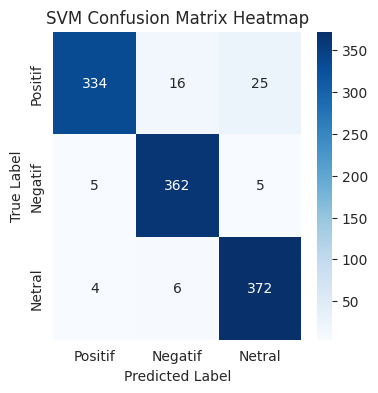

In [ ]:
# --- Heatmap Visualization ---
plt.figure(figsize=(4, 4))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.title("SVM Confusion Matrix Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
# Perhitungan akurasi
accuracy = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy)
print("")

accuracy_svm_percentage = accuracy * 100
print("SVM Accuracy:", "{:.2f}%".format(accuracy_svm_percentage))
print("")

# Laporan klasifikasi
classification_rep = classification_report(y_test, y_pred_svm)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.9459698848538529

SVM Accuracy: 94.60%

Classification Report:
              precision    recall  f1-score   support

     Negatif       0.94      0.97      0.96       372
      Netral       0.93      0.97      0.95       382
     Positif       0.97      0.89      0.93       375

    accuracy                           0.95      1129
   macro avg       0.95      0.95      0.95      1129
weighted avg       0.95      0.95      0.95      1129



In [ ]:
import pandas as pd

# Buat DataFrame hasil prediksi
df_svm = pd.DataFrame({
    'steming_data': X_test,
    'Actual': y_test,
    'Predicted': y_pred_svm
})

df_svm.to_csv('Hasil_pred_SVM.csv',encoding='utf8', index=False)

# Tampilkan DataFrame
df_svm.head(20)

,steming_data,Actual,Predicted
5290,bakar hutan rebak wilayah barat indonesia,Netral,Netral
2821,peristiwa isu ijazah jokowi bakar hutan hutan ...,Positif,Positif
2624,bakar hutan lahan landa israel rabu dewan aman...,Positif,Positif
1074,antisipasi bakar hutan lahan karhutla personil...,Positif,Positif
101,ayo belle lagiiiii kasih ciprat air bakar hutan,Positif,Netral
3919,apresisaai tri pilih prabowo bergasil kurang a...,Negatif,Negatif
4848,berita bakar israel april bakar hutan landa ye...,Netral,Netral
3110,athens bakar hutan cetus tenggara athens rebak...,Negatif,Negatif
167,aceh selatan personel brimob kompi batalyon si...,Positif,Positif
1729,nyata administrasi pltn zaporozhye bakar pltn ...,Netral,Netral
